In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset= pd.read_csv("C:/Users/malak/OneDrive - Alexandria University/Documents/ML/first_intern_project.csv")

In [5]:
# Shows the count of null values for each column
print(dataset.isnull().sum())




Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64


In [6]:
print(dataset.dtypes)

Booking_ID                   object
number of adults              int64
number of children            int64
number of weekend nights      int64
number of week nights         int64
type of meal                 object
car parking space             int64
room type                    object
lead time                     int64
market segment type          object
repeated                      int64
P-C                           int64
P-not-C                       int64
average price               float64
special requests              int64
date of reservation          object
booking status               object
dtype: object


In [11]:
dataset = dataset.drop(columns=['Booking_ID', 'date of reservation'], inplace=True) 


KeyError: "['Booking_ID', 'date of reservation'] not found in axis"

In [43]:
dataset['total days reserved'] = dataset['number of week nights'] + dataset['number of weekend nights']
dataset.drop(columns=['number of weekend nights','number of week nights'], inplace= True)

In [9]:
numerics = dataset.select_dtypes(include='number').columns

for col in numerics:
    Q1 = dataset[col].quantile(0.25)
    Q3 = dataset[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Keep only rows within the IQR range
    dataset = dataset[(dataset[col] >= lower_bound) & (dataset[col] <= upper_bound)]




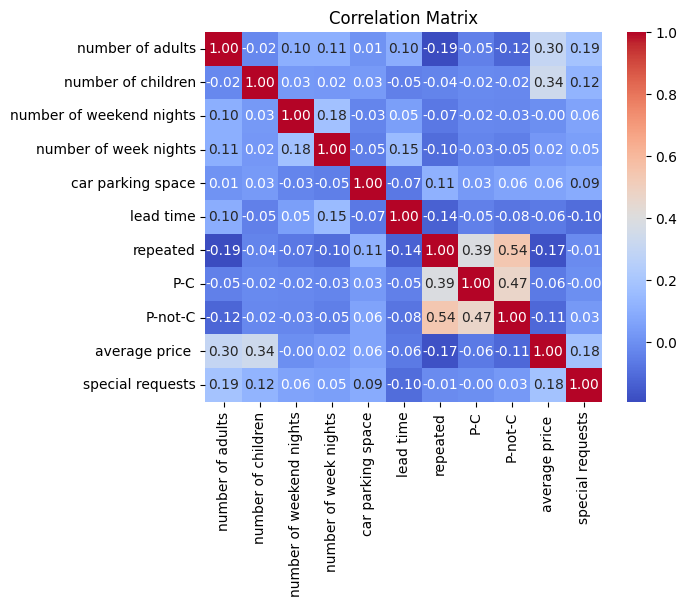

In [4]:
corr_matrix = dataset.corr(numeric_only=True)

# Plot heatmap

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [34]:
dataset.head()



,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [ ]:
dataset['type of meal'] = dataset['type of meal'].replace('Meal Plan 1',1)
dataset['type of meal'] = dataset['type of meal'].replace('Meal Plan 2',2)
dataset['type of meal'] = dataset['type of meal'].replace('Meal Plan 3',3)
dataset['type of meal'] = dataset['type of meal'].replace('Not Selected',0)
dataset['type of meal'].unique()
#Assuming that Meal_Plans are ranked depending on price 


array([1, 0, 2, 3])

In [38]:
dataset.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,0,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,0,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [9]:
dataset = pd.get_dummies(dataset, columns=['market segment type'])


In [10]:
dataset.head()

,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,repeated,P-C,P-not-C,average price,special requests,booking status,market segment type_Aviation,market segment type_Complementary,market segment type_Corporate,market segment type_Offline,market segment type_Online
0,1,1,2,5,Meal Plan 1,0,1,224,0,0,0,88.00,0,Not_Canceled,False,False,False,True,False
1,1,0,1,3,Not Selected,0,1,5,0,0,0,106.68,1,Not_Canceled,False,False,False,False,True
2,2,1,1,3,Meal Plan 1,0,1,1,0,0,0,50.00,0,Canceled,False,False,False,False,True
3,1,0,0,2,Meal Plan 1,0,1,211,0,0,0,100.00,1,Canceled,False,False,False,False,True
4,1,0,1,2,Not Selected,0,1,48,0,0,0,77.00,0,Canceled,False,False,False,False,True


In [8]:
dataset['room type'] = dataset['room type'].replace('Room_Type 1',1)
dataset['room type'] = dataset['room type'].replace('Room_Type 2',2)
dataset['room type'] = dataset['room type'].replace('Room_Type 3',3)
dataset['room type'] = dataset['room type'].replace('Room_Type 4',4)
dataset['room type'] = dataset['room type'].replace('Room_Type 5',5)
dataset['room type'] = dataset['room type'].replace('Room_Type 6',6)
dataset['room type'] = dataset['room type'].replace('Room_Type 7',7)

#Assuming that room type is ranked depending on the area of the room 
dataset.head()


C:\Users\malak\AppData\Local\Temp\ipykernel_17684\2789085364.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['room type'] = dataset['room type'].replace('Room_Type 7',7)


,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,booking status
0,1,1,2,5,Meal Plan 1,0,1,224,Offline,0,0,0,88.00,0,Not_Canceled
1,1,0,1,3,Not Selected,0,1,5,Online,0,0,0,106.68,1,Not_Canceled
2,2,1,1,3,Meal Plan 1,0,1,1,Online,0,0,0,50.00,0,Canceled
3,1,0,0,2,Meal Plan 1,0,1,211,Online,0,0,0,100.00,1,Canceled
4,1,0,1,2,Not Selected,0,1,48,Online,0,0,0,77.00,0,Canceled
